In [158]:
#importing the required libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [159]:
#loading dataset
df=pd.read_csv('Car_Price_Prediction.csv')
df.head()

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          1000 non-null   object 
 1   Model         1000 non-null   object 
 2   Year          1000 non-null   int64  
 3   Engine Size   1000 non-null   float64
 4   Mileage       1000 non-null   int64  
 5   Fuel Type     1000 non-null   object 
 6   Transmission  1000 non-null   object 
 7   Price         1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [161]:
df.isnull().sum()

Make            0
Model           0
Year            0
Engine Size     0
Mileage         0
Fuel Type       0
Transmission    0
Price           0
dtype: int64

In [162]:
df['Make'].unique()

array(['Honda', 'Ford', 'BMW', 'Audi', 'Toyota'], dtype=object)

In [163]:
df['Model'].unique()

array(['Model B', 'Model C', 'Model A', 'Model D', 'Model E'],
      dtype=object)

<Axes: ylabel='Mileage'>

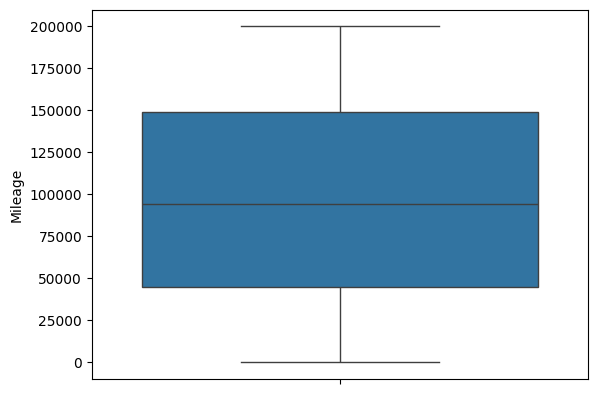

In [164]:
sns.boxplot(y='Mileage',data=df)

<Axes: ylabel='Model'>

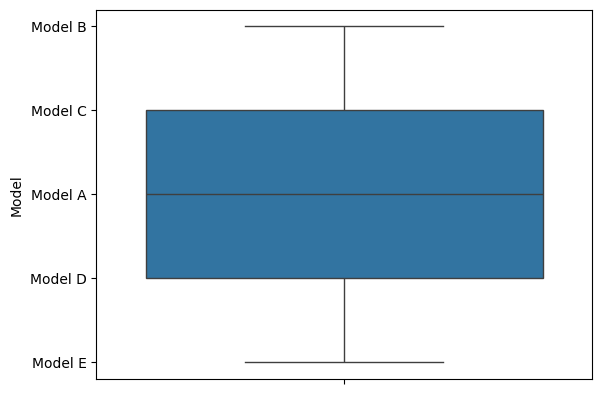

In [165]:
sns.boxplot(y='Model',data=df)

<Axes: ylabel='Year'>

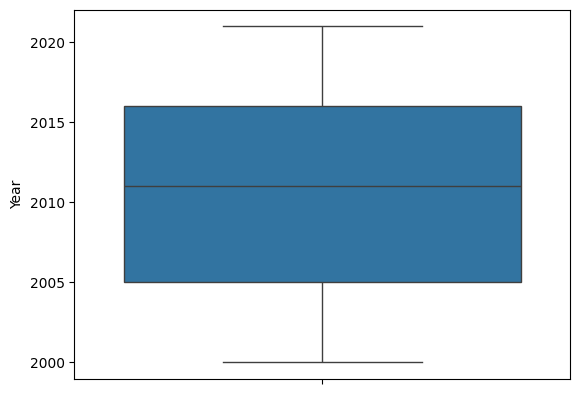

In [166]:
sns.boxplot(y='Year',data=df)

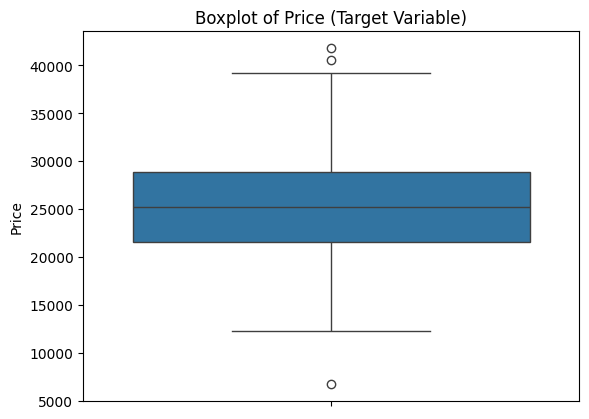

In [167]:
sns.boxplot(df["Price"])
plt.title("Boxplot of Price (Target Variable)")
plt.show()


In [168]:
copied_dataset = df.copy()

In [169]:
from sklearn.preprocessing import LabelEncoder
obj=LabelEncoder()
df['Make']=obj.fit_transform(df['Make'])
df['Model']=obj.fit_transform(df['Model'])
df['Transmission']=obj.fit_transform(df['Transmission'])
df['Fuel Type']=obj.fit_transform(df['Fuel Type'])
df.head()

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,3,1,2015,3.9,74176,2,1,30246.207931
1,2,2,2014,1.7,94799,1,0,22785.747684
2,1,1,2006,4.1,98385,1,1,25760.290347
3,3,1,2015,2.6,88919,1,0,25638.003491
4,3,2,2004,3.4,138482,2,0,21021.386657


In [170]:
X=df.drop('Price',axis=1)
y=df['Price']

In [171]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=42)

In [172]:
lr_model=LinearRegression()
lr_model.fit(Xtrain,ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [173]:
y_pred=lr_model.predict(Xtest)

In [174]:
print(f'training_efficiency:{lr_model.score(Xtrain,ytrain)}')
print(f'testingefficiency:{lr_model.score(Xtest,ytest)}')

training_efficiency:0.8446219786687317
testingefficiency:0.8251833567023288


In [175]:
with open("LinearModel.pkl", "wb") as file:
    pickle.dump(lr_model, file)


In [176]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import pickle

In [177]:
X = df.drop("Price", axis=1)
y = df["Price"]

In [178]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [179]:
model = RandomForestRegressor(random_state=42)

params = {
    "n_estimators": [100, 150, 200, 250, 300],  
    "max_depth": [3, 4, 5, 6]                  
}


In [180]:
grid = GridSearchCV(estimator=model, param_grid=params, cv=5, n_jobs=-1)
grid.fit(Xtrain, ytrain)

,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [3, 4, ...], 'n_estimators': [100, 150, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,150


In [181]:
y_pred = grid.predict(Xtest)

In [182]:
print(f'training_efficiency:{grid.score(Xtrain,ytrain)}')
print(f'testingefficiency:{grid.score(Xtest,ytest)}')

training_efficiency:0.9001135711542728
testingefficiency:0.8053625670885985


In [183]:
import pickle

with open("RFmodel.pkl", "wb") as file:
    pickle.dump(grid.best_estimator_, file)


In [184]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [185]:
X = df.drop("Price", axis=1)  
y = df["Price"]  

In [186]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)


In [187]:
model = GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=42)

In [188]:
model.fit(Xtrain,ytrain)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [189]:
print('training',model.score(Xtrain,ytrain))
print('testing',model.score(Xtest,ytest))

training 0.9059809662227692
testing 0.794305092278189


In [190]:
ypred=model.predict(Xtest)
r2_score(ytest,ypred)

0.794305092278189

In [194]:
print("Mean Absolute Error:", mean_absolute_error(ytest, ypred))

Mean Absolute Error: 1866.8705365077376


In [196]:
import pickle
with open("GBModel.pkl", "wb") as file:
    pickle.dump(model, file)

In [192]:
copied_dataset.to_csv('copied.csv')

In [193]:
import sklearn
sklearn.__version__

'1.7.1'